In [1]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from db_initialize import *
# here we assume that database.db only contains data from healingwell
engine = create_engine('sqlite://///Users/Johnson/Documents/nit/thesis/forum_crawler/database.db')
Session = sessionmaker(bind=engine)
Base.metadata.bind = engine
session = Session()

In [2]:
import re
def word_count(doc):
    count = len(re.findall(r'\w+', doc))
    return count

In [10]:
thread = session.query(Thread).all()
#print(len(thread.posts))
for x in range(1,20):
    print("Word Count: %d" % word_count(thread[x].body))
    print(thread[x])
    #print(len(thread[x].posts))

Word Count: 487

Title: Cheaper version of pricey prostate cancer drug. 
User: FoxRun 
Time: 2016-08-31 18:54:00 
Posts: 3
URL: http://www.healingwell.com/community/default.aspx?f=35&m=3693749 
Biolyse Pharma stymied in effort to make cheaper version of pricey prostate cancer drug.

A small Canadian company has waded into a U.S. drug price controversy by offering to make an expensive prostate cancer drug for a fraction of the price.Right now Xtandi costs U.S. patients as much as $129,000 US a year, or about $90 per pill. St. Catharines, Ont.-based Biolyse Pharma says it can make the drug for $3 a pill, or $4,400 per year, but has so far been unable to get U.S. health authorities to override the existing patent.Biolyse Pharma initially made the offer to make a cheaper version of Xtandi (enzalutamide) to the U.S. government in April. The issue resurfaced last week after pharmaceutical giant Pfizer announced it will pay $14 billion US to buy Medivation, the makers of the drug, primarily o

In [3]:
#total number of users
num_users = session.query(User).count()
print("Total number of users: %d" % num_users)
#total number of threads
num_threads = session.query(Thread).count()
print("Total number of threads: %d" % num_threads)
#total number of posts
num_posts = session.query(Post).count()
print("Total number of posts: %d" % num_posts)

Total number of users: 6415
Total number of threads: 28922
Total number of posts: 343995


In [4]:
users = session.query(User).all()

In [9]:
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib2tikz import save as tikz_save
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

In [7]:
user_threads = np.array([len(user.threads) for user in users])

In [ ]:
user_posts = np.array([len(user.posts)+len(user.threads) for user in users])

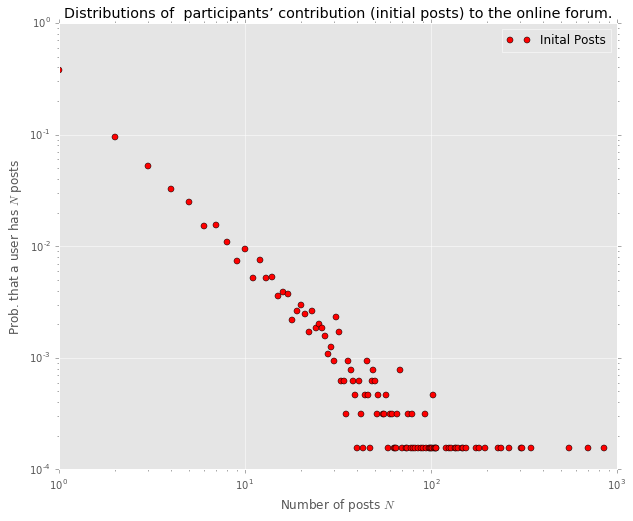

In [10]:
ini_bincount = np.bincount(user_threads)
int_prob = ini_bincount / len(user_threads)
total_bincount = np.bincount(user_posts)
total_prob = total_bincount / len(user_posts)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distributions of  participants’ contribution (initial posts) to the online forum.')
plt.xlabel(r'Number of posts $N$')
plt.ylabel(r'Prob. that a user has $N$ posts')
plt.plot(np.arange(len(ini_prob)), ini_prob, 'ro', label='Inital Posts')
plt.plot(np.arange(len(total_prob), total_prob, 'wo', label='Total Posts')
plt.legend()
plt.grid(True)

plt.show()
#tikz_save('test.tex')

In [ ]:
threads = session.query(Thread).all()

In [ ]:
thread_posts = np.array([len(thread.posts) for thread in threads])

In [ ]:
post_bitcount = np.bitcount(thread_posts)
post_prob = post_bitcount / len(threads)
style.use('ggplot')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of the number of replies to threads in the forum.')
plt.xlabel(r'Number of replies $N$')
plt.ylabel(r'Prob. that a thread has $N$ replies')
plt.plot(np.arange(len(post_prob)), post_prob, 'ro', label='Inital Posts')
plt.legend()
plt.grid(True)

plt.show()